In [174]:
import pandas as pd
import numpy as np

In [175]:
df = pd.read_csv("B:\placement\college_student_placement_dataset.csv")

In [176]:
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [177]:
df = df.drop(columns=["College_ID"])
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,No,1,8,0,Yes
9996,70,9.25,9.34,7,No,0,7,2,No
9997,89,6.08,6.25,3,Yes,3,9,5,No
9998,107,8.77,8.92,3,No,7,5,1,No


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      10000 non-null  int64  
 1   Prev_Sem_Result         10000 non-null  float64
 2   CGPA                    10000 non-null  float64
 3   Academic_Performance    10000 non-null  int64  
 4   Internship_Experience   10000 non-null  object 
 5   Extra_Curricular_Score  10000 non-null  int64  
 6   Communication_Skills    10000 non-null  int64  
 7   Projects_Completed      10000 non-null  int64  
 8   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 703.3+ KB


In [179]:
df.isnull().sum()

IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [180]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


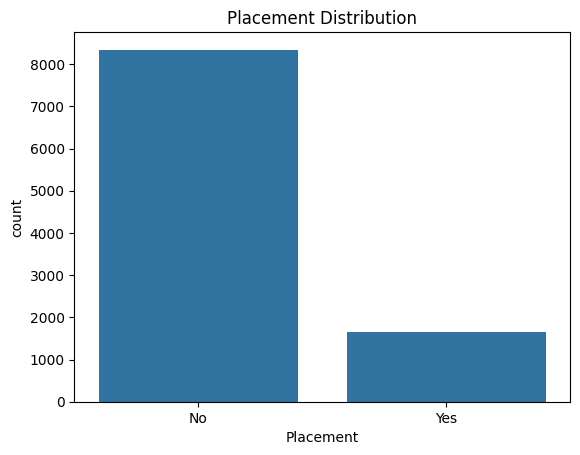

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Placement', data=df)
plt.title('Placement Distribution')
plt.show()


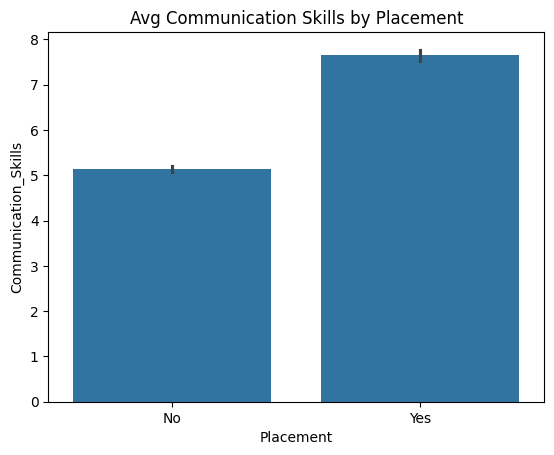

In [182]:
sns.barplot(x='Placement', y='Communication_Skills', data=df)
plt.title('Avg Communication Skills by Placement')
plt.show()


In [183]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE




In [184]:
label_enc = LabelEncoder()
df["Placement"] = label_enc.fit_transform(df["Placement"])  # Yes=1, No=0

In [185]:
categorical_cols = ["Internship_Experience"]  # 'Yes'/'No'
numerical_cols = [col for col in df.columns if col not in categorical_cols + ["Placement"]]


In [186]:
df["Internship_Experience"] = df["Internship_Experience"].map({"Yes": 1, "No": 0})


In [187]:
# 6. Final features and label
X = df.drop("Placement", axis=1)
y = df["Placement"]

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class balance
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Placement
0    6667
1    1333
Name: count, dtype: int64
After SMOTE: Placement
0    6667
1    6667
Name: count, dtype: int64


In [189]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [190]:
X.shape

(10000, 8)

In [191]:
y.shape

(10000,)

In [192]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [193]:
y_pred = model.predict(X_test_scaled)


In [194]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 1.0

📊 Confusion Matrix:
 [[1674    0]
 [   0  326]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1674
           1       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [195]:
import joblib

# Save model and scaler
joblib.dump(model, 'placement_model.sav')
joblib.dump(scaler, 'scaler.sav')


['scaler.sav']